### Travail en groupe :  Bains Anaïs , Albenge Joris , Lantrade Morgan

# Auriez-vous survécu au naufrage du titanic?

- Le but de cet exercice est de développer un modèle de prédiction de type kNN sur le jeu de données des survivants du Titanic.
- Ce modèle devra être développé et optimisé suivant la méthodologie présentée à l'exercice 1 (iris)
- Il pourra alors être utilisé pour déterminer qui d'entre nous aurait eu le plus de chance de survivre au naufrage du Titanic
- On pourra préciser les probabilités de survie à l'aide de la fonction predict_proba

### 1) Chargement et préparation des données

In [1]:
#On commence par importer nos bibliothèques habituelles
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier




In [2]:
titanic=sb.load_dataset('titanic')
titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Modifier les données de la manière suivante :
# on ne garde que ces 4 caractéristiques : 'survived','pclass','sex','age'
titanic=titanic.drop( ['sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],axis=1)
# on élimine les données incomplètes
# on remplace male par 0 et female par 1
titanic.dropna(axis=0,inplace=True) # on elève les lignes contenant des données manquantes
titanic.loc[titanic.sex=="male",'sex']=0
titanic.loc[titanic.sex=="female",'sex']=1
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [4]:
# la colonne survided sera notre y et class, sexe et âges nos caractéristiques X
age=titanic["age"].tolist()
classe=titanic["pclass"].tolist()
sexe=titanic["sex"].tolist()
X= np.array([ [a,b,c] for a,b,c in zip(classe,sexe,age)])
Y=titanic["survived"].tolist()



# Visualisation des données

In [5]:
%matplotlib notebook

## Fonctions de visualisations

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def showXY_3d(Xa,Xt,Ya,Yt,labels,legendes):
    #gauche
    fig=plt.figure(figsize=(10, 4))
    ax1=fig.add_subplot(121,projection='3d') # 3d
    scatter1=ax1.scatter(Xa[:, 0], Xa[:, 1],Xa[:,2],c=Ya)
    plt.legend(handles=scatter1.legend_elements()[0], labels=legendes)
    ax1.set_xlabel(labels[0])
    ax1.set_ylabel(labels[1])
    ax1.set_zlabel(labels[2])
    plt.title("Apprentissage")
    #droite
    ax2=fig.add_subplot(122,projection='3d')
    scatter2=ax2.scatter(Xt[:, 0], Xt[:, 1],Xt[:,2],c=Yt)
    plt.legend(handles=scatter2.legend_elements()[0], labels=legendes)
    ax2.set_xlabel(labels[0])
    ax2.set_ylabel(labels[1])
    ax2.set_zlabel(labels[2])
    plt.title("Test")
    
#Affiche les données resultats et les données predictions : les erreurs sont afficher en bleu
def showComparaison_3d(Xa,Xt,Ya,Yt,predictions,labels,legendes):
    #gauche
    fig=plt.figure(figsize=(10, 4))
    ax1=fig.add_subplot(121,projection='3d')
    ax1.scatter(Xa[:, 0], Xa[:, 1],Xa[:,2],c=Ya,alpha=0.05)
    scatter1=ax1.scatter(Xt[:, 0], Xt[:, 1],Xt[:,2],c=Yt)
    plt.legend(handles=scatter1.legend_elements()[0], labels=legendes)
    ax1.set_xlabel(labels[0])
    ax1.set_ylabel(labels[1])
    ax1.set_zlabel(labels[2])
    plt.title("Apprentissage")
    #droite
    ax2=fig.add_subplot(122,projection='3d')
    ax2.scatter(Xa[:, 0], Xa[:, 1],Xa[:,2],c=Ya,alpha=0.05)
    scatter2=ax2.scatter(Xt[:, 0], Xt[:, 1],Xt[:,2],c=predictions)
    plt.legend(handles=scatter2.legend_elements()[0], labels=legendes)
    
    ax2.set_xlabel(labels[0])
    ax2.set_ylabel(labels[1])
    ax2.set_zlabel(labels[2])
    plt.title("Test")
    






<IPython.core.display.Javascript object>


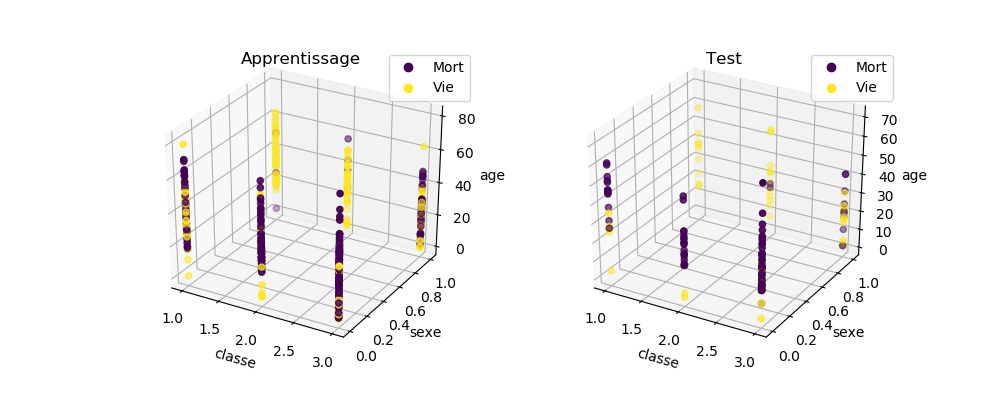

In [7]:
Xa,Xt,Ya,Yt=train_test_split(X,Y, test_size=0.2,shuffle=True)     
showXY_3d(Xa,Xt,Ya,Yt,["classe","sexe","age"],["Mort","Vie"])

<IPython.core.display.Javascript object>


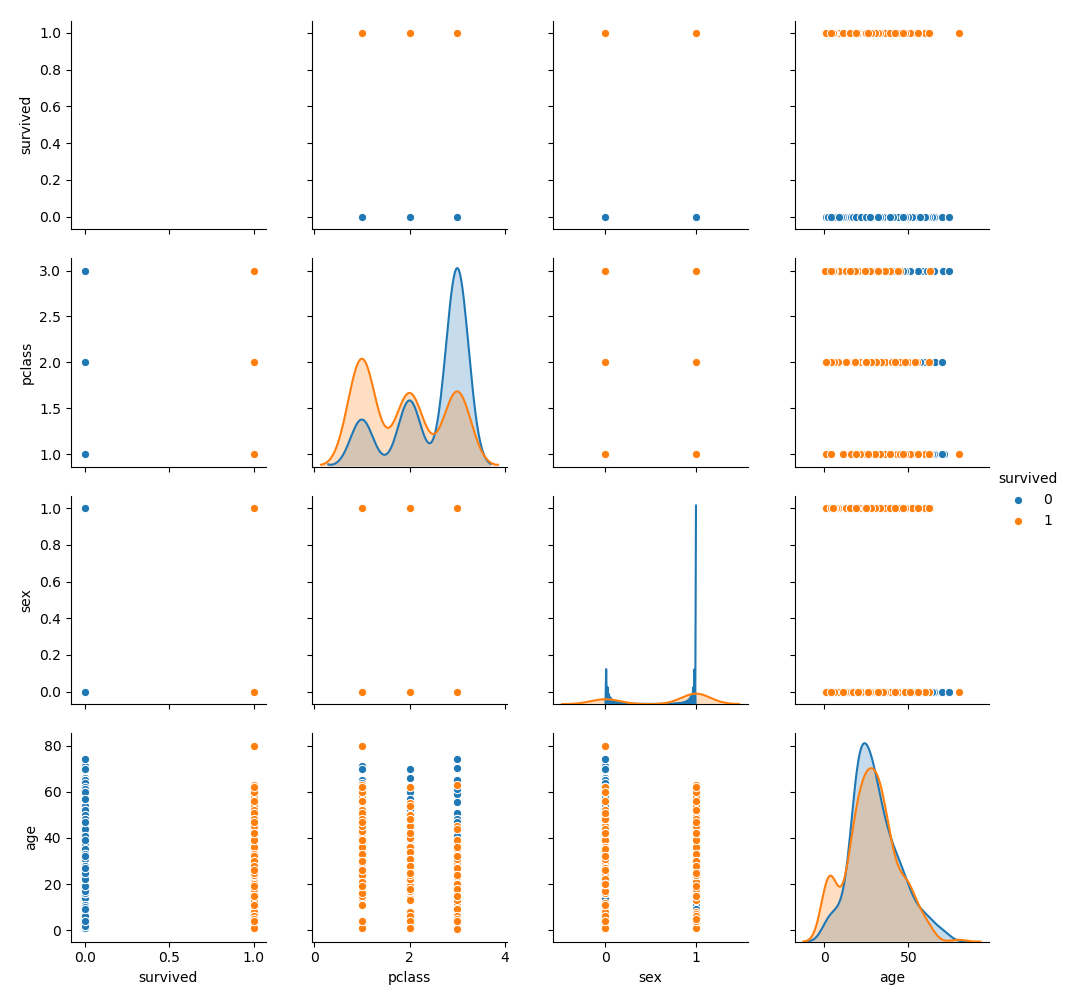

C:\Users\jeffs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jeffs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [8]:
sb.pairplot(titanic,hue="survived")
plt.show()

<IPython.core.display.Javascript object>


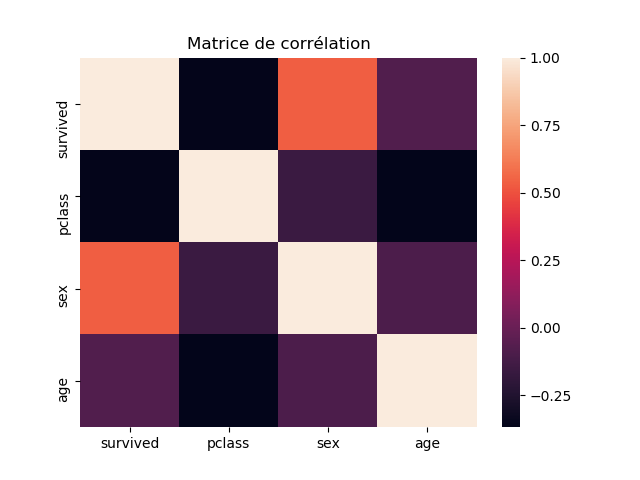

          survived    pclass       sex       age
survived  1.000000 -0.359653  0.538826 -0.077221
pclass   -0.359653  1.000000 -0.155460 -0.369226
sex       0.538826 -0.155460  1.000000 -0.093254
age      -0.077221 -0.369226 -0.093254  1.000000


In [9]:
# Visualisation de matrices de corrélation
plt.figure()
A=titanic.corr()
print(A)
sb.heatmap(A)
plt.title("Matrice de corrélation")
plt.show()

On remarque que le sexe est plus lié à la survie que les classes.


<IPython.core.display.Javascript object>


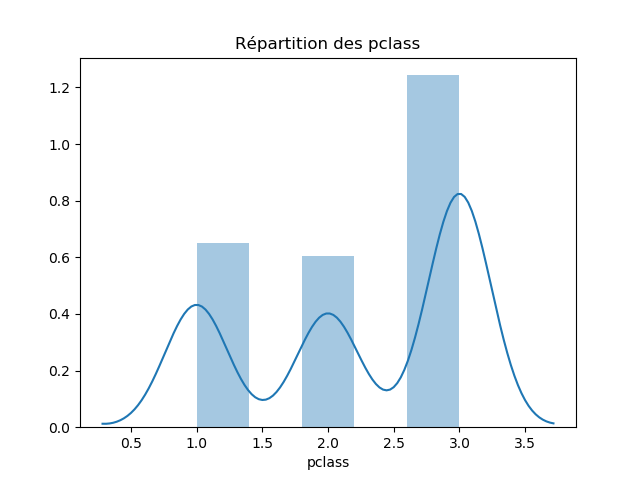

In [10]:
fig=plt.figure()
sb.distplot(titanic['pclass']).set_title('Répartition des pclass')
print()

On remarque que la classe 3 est plus présente que les autres.

<IPython.core.display.Javascript object>


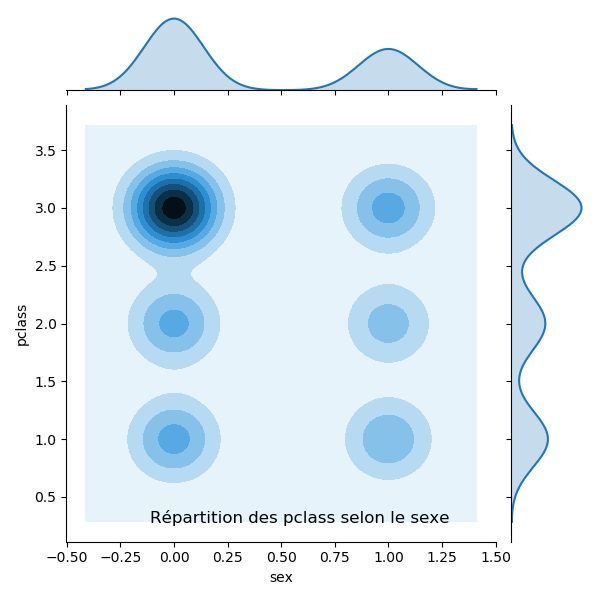

<IPython.core.display.Javascript object>


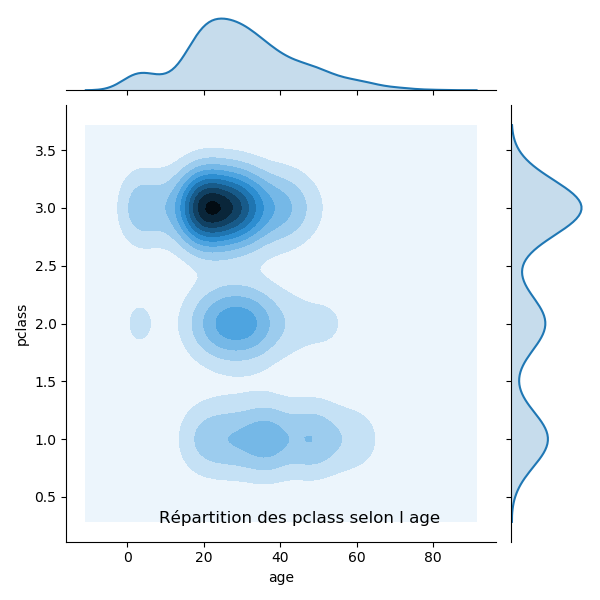

In [11]:

sb.jointplot('sex','pclass',data=titanic,kind='kde')
plt.suptitle('Répartition des pclass selon le sexe',y=0.15)
sb.jointplot('age','pclass',data=titanic,kind='kde')
plt.suptitle('Répartition des pclass selon l age',y=0.15)

print()

Et que celle-ci est majoritairement composée d'hommes et de personnes entre 20 et 40 ans.

<IPython.core.display.Javascript object>


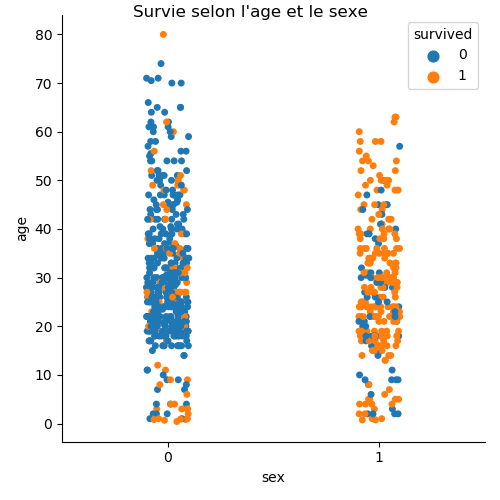

In [12]:
sb.catplot(x='sex',y='age',data=titanic,hue='survived',legend_out=False)
plt.suptitle("Survie selon l'age et le sexe",y=0.99)
print()

On voit bien que pour les hommes entre 20 et 40 ans ( appartenant donc majoritairement à la pclass 3) n'ont pas survécu.

<IPython.core.display.Javascript object>


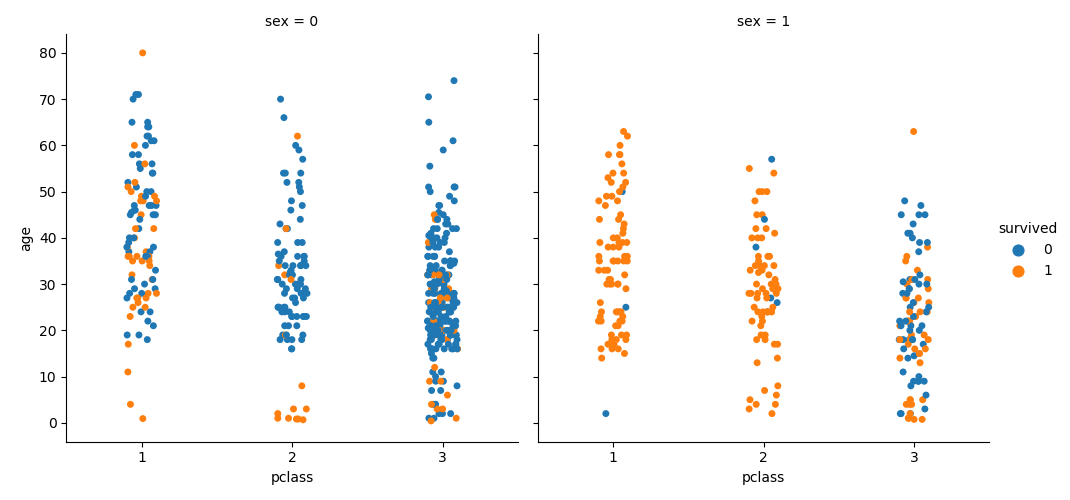

In [13]:
sb.catplot(x="pclass", y="age", hue="survived",
                col="sex", data=titanic)
print()


En séparant les données par le sexe, on voit bien que le lien entre la survie et le sexe est conséquent.
Et on voit bien que la 3 ème pclass contient plus de victimes.

## Comparaison

Score pour k = 3 :  0.7062937062937062
101 / 143


<IPython.core.display.Javascript object>


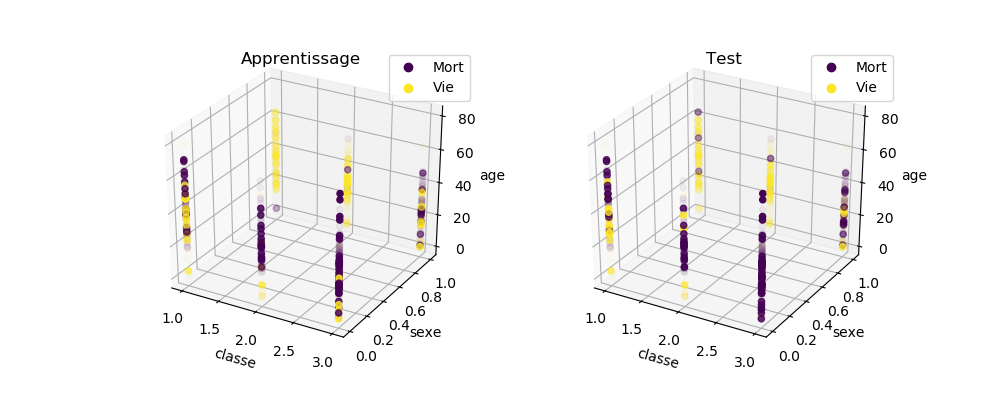

In [14]:
# Comparer les étiquettes des données de test aux valeurs prédites à l'aide de la méthode predict
# noter le rôle des paramètres metric et n_neighbors
Xa,Xt,Ya,Yt=train_test_split(X,Y, test_size=0.2,shuffle=True)   
k=3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(Xa,Ya)
predictions=neigh.predict(Xt)
score=[ prediction==resultat for prediction,resultat in zip(predictions,Yt)] #Comparaison prediction,resultat
print("Score pour k =",k,": ",score.count(True)/len(Xt))
print(score.count(True),"/",len(Xt))
       
showComparaison_3d(Xa,Xt,Ya,Yt,predictions,["classe","sexe","age"],["Mort","Vie"]) 

## Recherche du nombre de voisins optimal selon le découpage

<IPython.core.display.Javascript object>


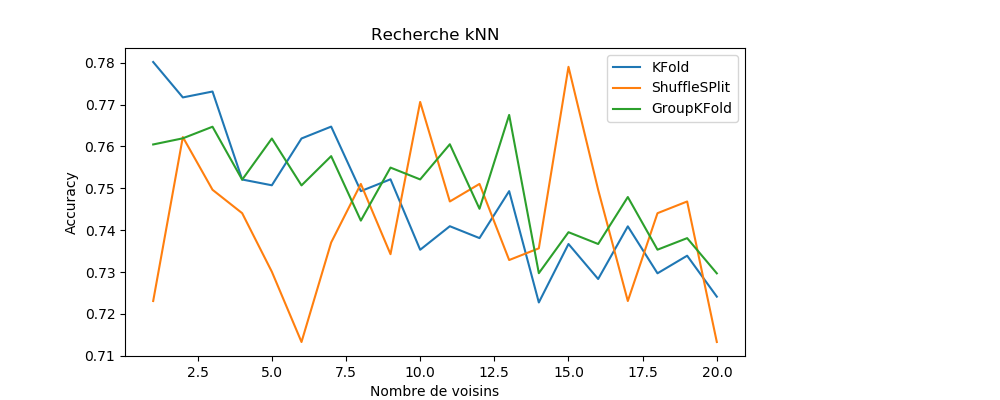

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,ShuffleSplit,StratifiedKFold,GroupKFold
'''
Kfold : découpe 5 fois en 20/80
ShuffleSPlit : (mélange et découpe) 5 fois en 80/20
GroupKFold : découpe selon des groupes : ici on choisit les pclass par exemple
'''
cv= {'KFold' : KFold(5,random_state=0) , 'ShuffleSPlit' : ShuffleSplit(5,test_size=0.2),
     'GroupKFold' : GroupKFold(5).get_n_splits(X,Y,groups=X[:,0])}

plt.figure(figsize=(10,4))
# get the current axis
ax = plt.gca()
# Shink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

L={ decoupe : [] for decoupe in cv}
for decoupe in cv:
    for k in range(1,21) :
        neigh = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(neigh, X, Y, cv=cv[decoupe])
        L[decoupe].append(score.mean()) 

    plt.plot(list(range(1,21)),L[decoupe],label=decoupe)
plt.title('Recherche kNN')
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.legend(loc=1)
print()



On remarque un pic entre 10 et 15 voisins.

## Recherche du modele optimal

In [16]:
from sklearn.model_selection import GridSearchCV
L=list(range(1,21))
param= { "n_neighbors" : L, "metric" : ['manhattan','euclidean']}
neigh = KNeighborsClassifier() #estimator
   
clf = GridSearchCV(neigh, param) 
clf.fit(X, Y)
clf.best_params_

C:\Users\jeffs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'metric': 'manhattan', 'n_neighbors': 11}

In [17]:
# Afficher le meilleur score obtenu, les meilleurs paramètres et retenir le meilleur modèle sous le nom "monModel"
Xa,Xt,Ya,Yt=train_test_split(X,Y, test_size=0.2,shuffle=True)  
monModel=clf.best_params_
neigh = KNeighborsClassifier(n_neighbors=monModel['n_neighbors'],metric=monModel['metric'])
neigh.fit(Xa, Ya)
predictions=neigh.predict(Xt).tolist()

# sur les données d'apprentissage?
print(monModel['n_neighbors']," voisins :")
print("Score sur valeurs d'apprentissages :",neigh.score(Xa, Ya)) 

# sur les données de test?
print("Score sur valeurs de tests         :",neigh.score(Xt, Yt)) 




11  voisins :
Score sur valeurs d'apprentissages : 0.8021015761821366
Score sur valeurs de tests         : 0.8251748251748252


<IPython.core.display.Javascript object>


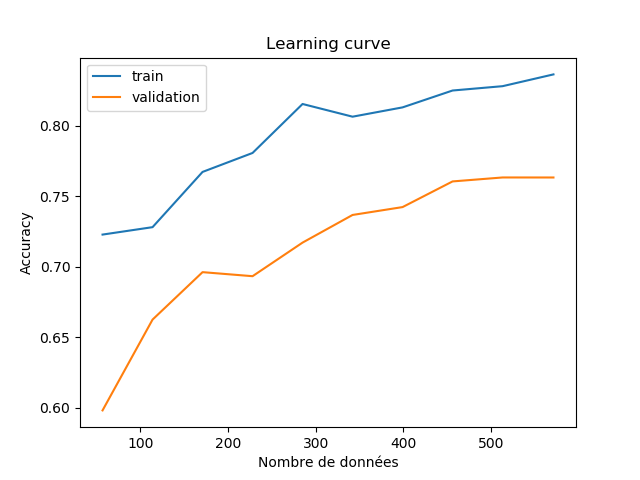

In [18]:
from sklearn.model_selection import learning_curve
neigh = KNeighborsClassifier(n_neighbors=5)
train_sizes, train_scores, test_scores = learning_curve(estimator=neigh, X=X, y=Y, cv=5,train_sizes=np.linspace(0.1, 1.0, 10))
train=[ cv.mean() for cv in train_scores]
test=[ cv.mean() for cv in test_scores]

# Afficher à l'aide de la fonction learning_curve la courbe d'apprentissage du modèle monModel.

plt.figure()
plt.plot(train_sizes,train,label='train')
plt.plot(train_sizes,test,label='validation')
plt.title('Learning curve')
plt.xlabel('Nombre de données')
plt.ylabel('Accuracy')
plt.legend()
print()


In [19]:
age=20
sexe=1

Xa,Xt,Ya,Yt=train_test_split(X,Y, test_size=0.2,shuffle=True)  


def survivraTu(age,sexe,Xa,Ya,Xt,Yt):
    neigh = KNeighborsClassifier(n_neighbors=11)
    neigh.fit(Xa,Ya) 
    print("Avec un score de",round(neigh.score(Xt,Yt),2)*100,"% de bonnes réponses.\nJe prédis que: ")
     
    for pclass in range(1,4):
        personne=np.array([[pclass,sexe,age]])
        print("En classe",pclass,": Tu aurais du "+("survivre" if neigh.predict(personne)[0]==1 else "mourrir")+" au naufrage.")
        print(neigh.predict_proba(personne)[0]) #affiche le % mort-vie
        print('--------------')
    
survivraTu(age,sexe,Xa,Ya,Xt,Yt)
survivraTu(28,1,Xa,Ya,Xt,Yt) #homme de 30 ans en classe 3 a peu de chance de survivre


Avec un score de 80.0 % de bonnes réponses.
Je prédis que: 
En classe 1 : Tu aurais du survivre au naufrage.
[0.45454545 0.54545455]
--------------
En classe 2 : Tu aurais du survivre au naufrage.
[0.45454545 0.54545455]
--------------
En classe 3 : Tu aurais du mourrir au naufrage.
[0.63636364 0.36363636]
--------------
Avec un score de 80.0 % de bonnes réponses.
Je prédis que: 
En classe 1 : Tu aurais du survivre au naufrage.
[0.27272727 0.72727273]
--------------
En classe 2 : Tu aurais du survivre au naufrage.
[0.45454545 0.54545455]
--------------
En classe 3 : Tu aurais du mourrir au naufrage.
[0.54545455 0.45454545]
--------------
